In [1]:
from datascience import *
eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)

array([0.25, 0.75])

In [2]:
(100 * sample_proportions(100, eligible_population)).item(0)

24.0

In [0]:
def one_simulated_count():
    return (100 * sample_proportions(100,
            eligible_population)).item(0)

In [0]:
counts = make_array()
import numpy as np
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

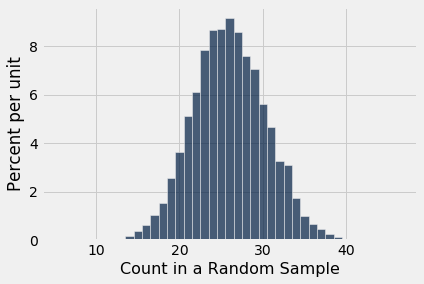

In [5]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

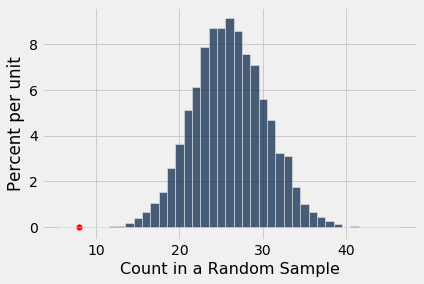

In [6]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.scatter(8, 0, color='red', s=30);

In [0]:
def distance_from_75(p):
    return abs(100*p - 75)

In [0]:
model_proportions = [0.75, 0.25]
def one_simulated_distance():
    proportion_purple_in_sample = sample_proportions(929,
                              model_proportions).item(0)
    return distance_from_75(proportion_purple_in_sample)

In [0]:
distances = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

In [10]:
705 / 929

0.7588805166846071

In [11]:
observed_statistic = distance_from_75(705/929)
observed_statistic

0.8880516684607045

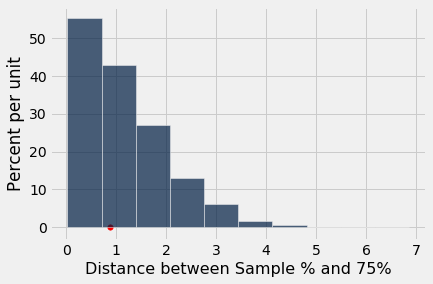

In [12]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.scatter(observed_statistic, 0, color='red', s=30);

In [0]:
def proportions_from_distribution(table, label, sample_size):
    proportions = np.random.multinomial(sample_size,
                            table.column(label))/sample_size
    return table.with_column('Random Sample', proportions)

In [14]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 
                            'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


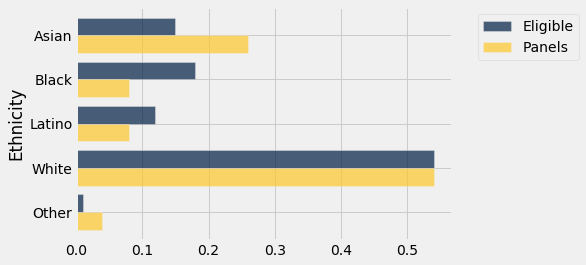

In [15]:
jury.barh('Ethnicity')

In [16]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.163799
Black,0.18,0.08,0.194769
Latino,0.12,0.08,0.128011
White,0.54,0.54,0.501721
Other,0.01,0.04,0.0116999


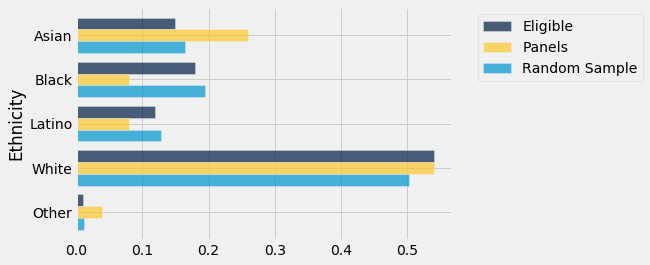

In [17]:
panels_and_sample.barh('Ethnicity')

In [18]:
jury_with_diffs = jury.with_column(
  'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [19]:
jury_with_diffs = jury_with_diffs.with_column('Absolute Difference',
     np.abs(jury_with_diffs.column('Difference'))
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [20]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14

In [0]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [22]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14

In [23]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.0364280798348245

In [0]:
def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)

tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

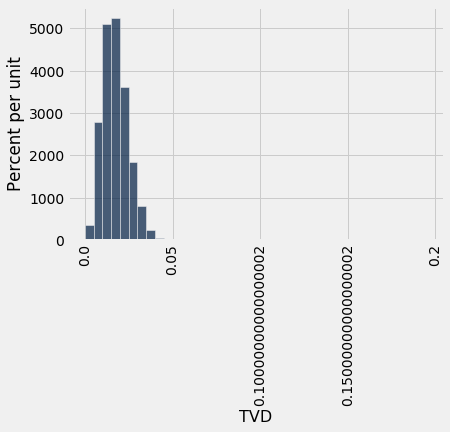

In [25]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

In [26]:
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
scores = Table.read_table(path_data + 'scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [27]:
section_averages = scores.group('Section', np.average)
section_averages.show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [28]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [0]:
scores_only = scores.drop('Section')

In [30]:
random_sample = scores_only.sample(27, with_replacement=False)
random_sample

Midterm
21
14
23
13
13
19
24
10
11
13


In [31]:
np.average(random_sample.column('Midterm'))

16.555555555555557

In [0]:
def random_sample_average():
    random_sample = scores_only.sample(27, with_replacement=False)
    return np.average(random_sample.column('Midterm'))

sample_averages = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages,
                    random_sample_average())


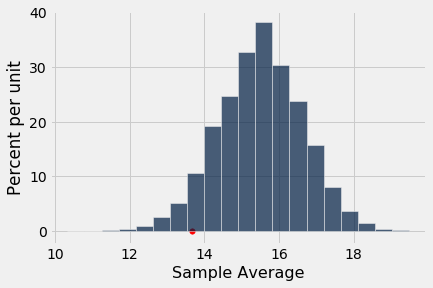

In [33]:
averages_tbl = Table().with_column('Sample Average', sample_averages)
averages_tbl.hist(bins=20)
observed_statistic = 13.667
plots.scatter(observed_statistic, 0, color='red', s=30);

In [34]:
np.count_nonzero(sample_averages <= observed_statistic) / repetitions

0.0553

In [0]:
fair_coin = [1, 0]
def one_simulated_statistic():
    number_of_heads = sum(np.random.choice(fair_coin, 2000))
    return abs(number_of_heads - 1000)

statistics = make_array()
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

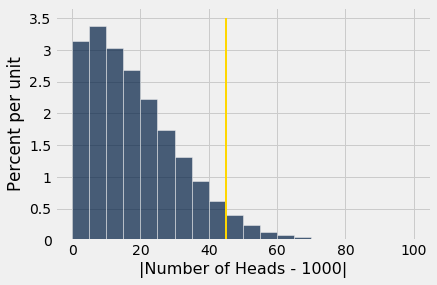

In [36]:
results = Table().with_column('|Number of Heads - 1000|', statistics)
results.hist(bins = np.arange(0, 101, 5))
plots.plot([45, 45], [0, 0.035], color='gold', lw=2);